In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# A Discrete Convolution Program (5 pts)

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions. 

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.
 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=50$, $N_w=100$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.
 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

1) The length of $ \{ g_n \} $, the output time series obtained by convolving two arrays $ \{ f_i \} $ and $ \{ w_j \} $, can have a maximum of $ N_g = N_f + N_w - 1 $ non-zero points. This is because the convolution operation combines each point of the input arrays with all points of the other array, potentially creating $ N_f $ + $ N_w $ - 1 non-zero points in the output, where $ N_f $ and $ N_w $ are the lengths of the input arrays $ \{ f_i \} $ and $ \{ w_j \} $, respectively. Additionally, if we consider convolution as the process of placing the smaller array on top of the larger one and sliding the smaller one past the larger one index at a time, calculating the element-wise product sum at each position and adding it to the resulting array, this process will take $ x $ steps, where $ x $ is the sum of the length of each array minus 1, since the arrays overlap by at least 1 index this amount of times. Therefore, the resulting array will have a length of $ N_g = N_f + N_w - 1 $.


In [2]:
def myConv(f, w):
    len_f, len_w = len(f), len(w)
    result = [0] * (len_f + len_w - 1)

    for i in range(len_f):
        for j in range(len_w):
            result[i + j] += f[i] * w[j]

    return result

Text(0.5, 1.0, 'Accuracy of MyConv')

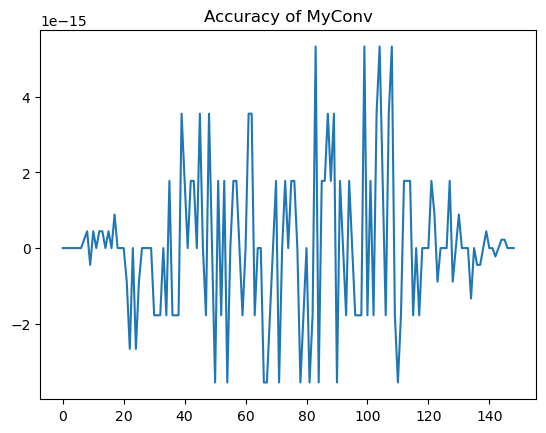

In [3]:
# Testing myConv
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt

arr1 = []
arr2 = []
differences = []

arr1 = np.random.rand(50)
arr2 = np.random.rand(100)

g = np.convolve(arr1, arr2)
result = myConv(arr1, arr2)

plt.plot(g - result)
plt.title("Accuracy of MyConv")

One possible reason that the convolution function I wrote has a worse runtime compared to the numpy convolve function is that the numpy library is written in C and C code compiles faster than Python code. However, this effect is probably negligible; more likely, numpy's function is simply a lot more efficient in its implementation, using a highly optimized algorithm and data structures.

Time for numpy Convolve: 3.5762786865234375e-05
Time for myConv: 1.1920928955078125e-05
Time for numpy Convolve: 5.340576171875e-05
Time for myConv: 0.0006823539733886719
Time for numpy Convolve: 0.0007083415985107422
Time for myConv: 0.07099032402038574
Time for numpy Convolve: 0.06334519386291504
Time for myConv: 8.033350706100464


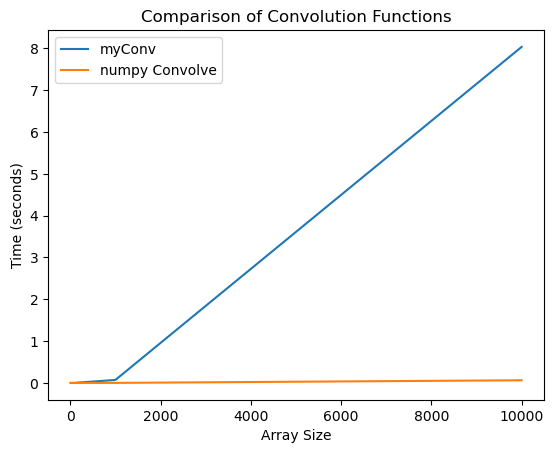

In [4]:
%matplotlib inline
import time
import random
import numpy as np
import matplotlib.pyplot as plt

def arrayBuilder(n):
    return list(range(n))

sizes = [10, 100, 1000, 10000]
time_myConv = []
time_numpyConv = []

for n in sizes:
    f = arrayBuilder(n)
    w = arrayBuilder(n)
    
    t1 = time.time()
    np_convolve_result = np.convolve(f, w)
    t2 = time.time()
    time_numpyConv.append(t2 - t1)
    print("Time for numpy Convolve:", t2 - t1)
    
    t1 = time.time()
    my_conv_result = myConv(f, w)
    t2 = time.time()
    time_myConv.append(t2 - t1)
    print("Time for myConv:", t2 - t1)

plt.figure()
plt.plot(sizes, time_myConv, label='myConv')
plt.plot(sizes, time_numpyConv, label='numpy Convolve')
plt.title('Comparison of Convolution Functions')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show() 

# Simple Physical System: RL Circuit Response (7 pts)

Note: I worked with Aaryan Thusoo on this question

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with inductance `L`) in series.  We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.
 2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here (if you are not using a jupyter notebook). (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)
 3. Using $R = 950 \Omega$, $L = 4 H$, and sampling period $dt = 0.15 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 15 ms. Please list your Python
    code here (if you are not using a jupyter notebook).

By Kirchoff's Law: 

$$ V_{\text{in}} = V_{R} + V_{I} $$

where $$ V_{I} = L \cdot \frac{dI}{dT} $$ and $$ V = IR $$. So,

$$ \frac{dI}{dT} + \frac{R \cdot I}{L} = \frac{1}{L} \cdot V_{\text{in}} $$

is our ordinary differential equation (ODE).

i) Solving for the Step Response:

We'll use an integrating factor $ \mu = e^{\int \frac{R}{L} \, dt} = e^{\frac{Rt}{L}} $ to rewrite the equation as:


$$ \frac{dI}{dT} \cdot e^{(Rt/L)} + \frac{R \cdot I}{L} \cdot e^{(Rt/L)} = \frac{1}{L} \cdot V_{\text{in}} \cdot e^{(Rt/L)} $$

$$ \left( I \cdot e^{\frac{Rt}{L}} \right)' = \frac{1}{L} \cdot H(t) \cdot e^{\frac{Rt}{L}} $$

$$ \int \left( I \cdot e^{\frac{Rt}{L}} \right)' dt = \int \frac{1}{L} \cdot H(t) \cdot e^{\frac{Rt}{L}} dt $$

$$ I \cdot e^{\frac{Rt}{L}} = \int \frac{1}{L} \cdot H(t) \cdot e^{\frac{Rt}{L}} dt $$

$$ I \cdot e^{\frac{Rt}{L}} = \frac{1}{L} \frac{L}{R} \left(e^{\frac{Rt}{L}} - 1 \right) $$

$$ I = \frac{1}{R} \left( 1 - e^{-\frac{Rt}{L}} \right) $$


Then, we have that

$$ S(t) = H(t) - IR $$
$$ S(t) = H(t) - \frac{1}{R} \left( 1 - e^{-\frac{Rt}{L}} \right) \cdot R $$
$$ S(t) = H(t) - (1 - e^{-\frac{Rt}{L}}) $$
$$ S(t) = H(t) - 1 + e^{-\frac{Rt}{L}} $$
$$ S(t) = e^{-\frac{Rt}{L}} + H(t) - 1 $$

Since $ H(t) = 1 $ for all $ t > 0 $, and we are only considering positive values of $ t $, then:

$$ S(t) = 1 - e^{-\frac{Rt}{L}} $$

for all $ t > 0 $.


ii) Solving for the Impulse Response:

The impulse response characterizes the system's immediate reaction to a sudden input, while the step response describes its response to a sustained input change. Considering the step response as the integral of the impulse response, it follows logically that the derivative of the step response reflects the system's instantaneous reaction to the step input. If we take the derivative of S(t), we obtain R(t), the impulse response.


$$ \frac{d}{dt}S(t) = \delta(t)e^{-\frac{Rt}{L}} - \frac{R}{L}e^{-\frac{Rt}{L}}H(t) $$

Now, since \$\frac{d}{dt}S(t) = \delta(t) $\, we can write:

$$ R(t) = \delta(t) e^{0} - \frac{R}{L} e^{-\frac{Rt}{L}} = \delta(t) - \frac{R}{L} e^{-\frac{Rt}{L}} $$

$$ R(t) = \delta(t) - \frac{R}{L} e^{-\frac{Rt}{L}} $$

where we assume as before that $ t > 0 $ so $ H(t) = 1 $ for all $ t $. 

# Convolution of Synthetic Seismograms (5 pts)

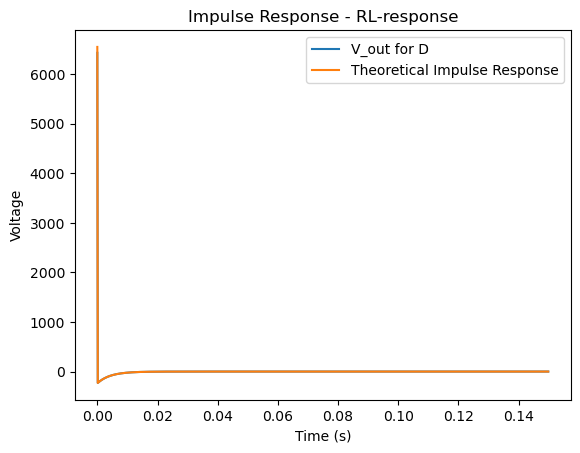

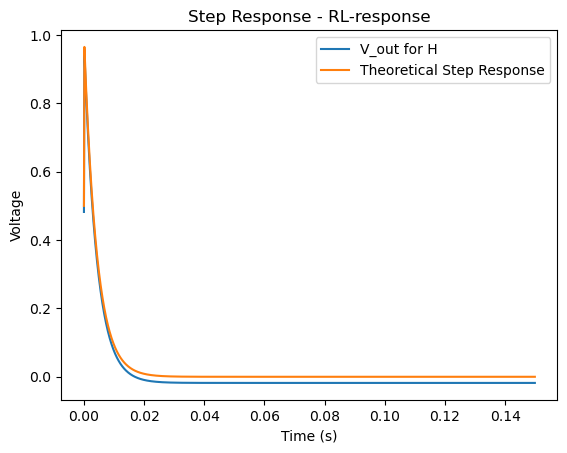

In [5]:
import math

# Discretized Step Function: H = [0.5,1,1,…]
H = np.ones(1000)
H[0] = 0.5

# Discretized Delta Function: D = [1/dt,0,0,…]
dt = 0.00015 # Sampling interval
D = np.zeros(1000)
D[0] = 1/dt


def RLresponse(R, L, V_in, dt):
    
    c = 0.001
    d = 2
    # Making an array of time values with interval dt
    t = np.arange(-c*dt, d*(len(V_in) - c) * dt, d*dt)
    t_prime = np.arange(0, len(H) * dt, dt)[:len(t)]
    
    # Exponential * H(t)
    exp_term = np.exp(R*(t_prime - t)/L)
    
    # Calculating V_out
    I = 1/L * np.convolve(V_in, exp_term)[:len(time)] * dt
    
    return (I * R)


# Applying RL-response to H
time = np.arange(0, len(H) * dt, dt)

# Constants
R = 950  # Ohms
L = 4    # Henrys
# dt same as before

# Discretized Impulse Response Function
impulse_response =  D - (R/L) * np.exp(-R * time / L) * H
actual_impulse_response = RLresponse(R, L, D, dt)

# Discretized Step Response Function
step_response = np.exp(-R * time / L) * H
actual_step_response = RLresponse(R, L, H, dt)
    

# Plotting Impulse Response Stuff
plt.plot(time, D - actual_impulse_response, label = "V_out for D")
plt.plot(time, impulse_response, label = "Theoretical Impulse Response")
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Impulse Response - RL-response')
plt.legend()
plt.figure()

# Plotting Step Response Stuff
plt.plot(time, H - actual_step_response, label = "V_out for H")
plt.plot(time, step_response, label = "Theoretical Step Response")
plt.title('Step Response - RL-response')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.legend()

Numerical simulations of seismic wave propagation can now be routinely done for [global and regional
earthquakes](http://global.shakemovie.princeton.edu/). For a recent southern Pakistan earthquake (Jan 18,
2011, 20:23:33 UTC), raw vertical synthetic seismogram (i.e., displacement field simulated at a seismic
station) for station `RAYN` (Ar Rayn, Saudi Arabia) is provided (`RAYN.II.LHZ.sem`). A common practice in
seismology is to convolve synthetic seismograms with a Gaussian function

$$ g(t) = \frac{1}{\sqrt{\pi}t_H} e^{-(t/t_H)^2} $$

to reflect either the time duration of the event or the accuracy of the numerical simulation.

 1. Provide two plots. Plot 1: the raw synthetic seismogram for station `RAYN` between 0 and 800 seconds. Plot 2: Gaussian
    functions with half duration $t_H = 10 \text{ sec}$ and $t_H = 20 \text{ sec}$ (include a legend). For the gaussians, use the same timestep $dt$ as the seismogram data.
 2. Use numpy's convolve function to convolve the raw timeseries with a Gaussian function (both $t_H = 10$ and $t_H = 20$ cases). Plot the raw data and the two convolved time series between 0 and 800 seconds on the same graph (include a legend) and comment on the differences in the convolved time series between the two cases.

__Hints__

* The raw synthetics `RAYN.II.LHZ.sem` is given as a text file with two columns: time in seconds and
displacement in meters.
* Gaussian functions quickly decay to zero beyond $[-3t_H, 3t_H ]$, therefore it is sufficient to sample $g(t)$
within this interval.
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the raw timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries. Alternatively, use the default mode (`'full'`) and truncate the output manually. 
* As a check for part 2, ensure that your convolved timeseries is aligned with (or "overlaps") the raw data timeseries.

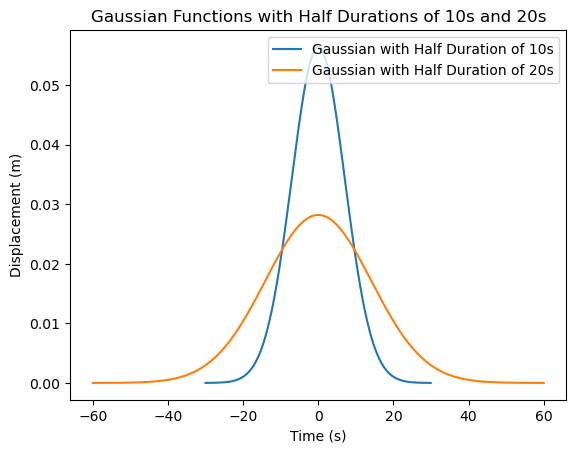

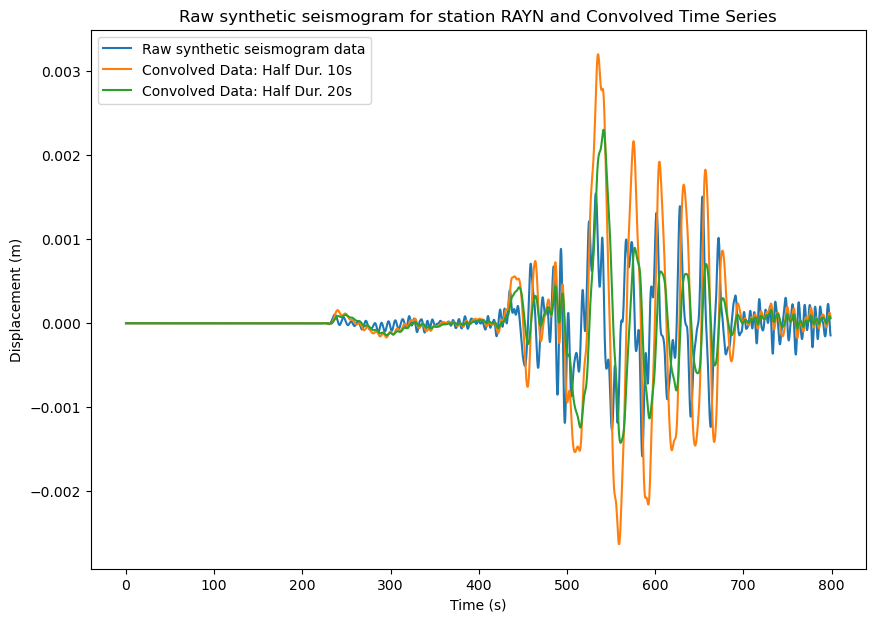

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Helper function to make the Gaussian Functions
def gaussian(t, t_H):
    return (1 / (np.sqrt(np.pi) * t_H)) * np.exp(-(t / t_H)**2)

# Data file
file_path = "RAYN.II.LHZ.sem"
time, displacement = np.loadtxt(file_path, unpack=True)

dt = 0.1615 # Sampling Interval
start_index = 8 # Index at which time is approximately 0
limit_index = math.ceil(800/dt) # Index at which time = 800s approx

# Data in between 0 and 800 seconds
time_range = time[start_index:limit_index]
displacement_range = displacement[start_index:limit_index]

# Convolving Raw Data with Gaussians
convolved_10 = np.convolve(displacement_range, gaussian(time_range, 10))[:4946]
convolved_20 = np.convolve(displacement_range, gaussian(time_range, 20))[:4946]

# Sampling range for Gaussians
sample_ten = np.arange(-3 * 10, 3 * 10, dt)
sample_twenty = np.arange(-3 * 20, 3 * 20, dt)

# Plot 1: Gaussian functions with Half Durations of 10s and 20s 
plt.plot(sample_ten, gaussian(sample_ten, 10), label = "Gaussian with Half Duration of 10s")
plt.plot(sample_twenty, gaussian(sample_twenty, 20), label = "Gaussian with Half Duration of 20s")
plt.title("Gaussian Functions with Half Durations of 10s and 20s")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.figure(figsize=(10, 7))

# Plot 2: Raw synthetic seismogram for station RAYN between 0 and 800 seconds 
plt.plot(time_range, displacement_range, label = "Raw synthetic seismogram data") # Raw data
plt.plot(time_range, convolved_10, label = "Convolved Data: Half Dur. 10s") # Convolved data)
plt.plot(time_range, convolved_20, label = "Convolved Data: Half Dur. 20s") # Convolved data)
plt.title("Raw synthetic seismogram for station RAYN and Convolved Time Series")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()

The convolution of the input data with the Gaussian function with a half-duration of 10s has a significantly larger amplitude (about 2x larger) than that of the convolution with the Gaussian function with a half-duration of 20s. In particular, the former has an amplitude consistently larger than that of the raw data, while the latter decays more quickly on either side of the largest peak. This makes sense since the narrower Gaussian has a larger amplitude than the wider one with a longer half-duration. Moreover, both convolutions have visibly smoothed the original data, essentially decreasing the resolution.